## Importing Package and DataSet

In [1]:
import pandas as pd
import numpy as np

#Chart
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#ML
from sklearn.cluster import KMeans #ML for Kmeans


In [2]:
import os
os.listdir()

['berat_tinggi.csv',
 'CE5_R Bimo Mandala Putra.ipynb',
 'flight.csv',
 'HW_Unsupervised_Clustering_R Bimo Mandala Putra.ipynb',
 'marketplace_customers.csv',
 'PR.ipynb']

In [3]:
data=pd.read_csv('flight.csv')
data.head(5).style

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.000000,3/31/2014,210,505308,239560.000000,234188.000000,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,nan,beijing,CN,42.000000,3/31/2014,140,362480,171483.000000,167434.000000,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.000000,3/31/2014,135,351159,163618.000000,164982.000000,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.000000,3/31/2014,23,337314,116350.000000,125500.000000,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.000000,3/31/2014,152,273844,124560.000000,130702.000000,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# Data Cleaning

In [4]:
data.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

## Nan & Null

In [6]:
data.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [7]:
data=data.dropna(subset=['SUM_YR_1','SUM_YR_2'])
data

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62982,16415,1/20/2013,1/20/2013,Female,4,beijing,.,CN,35.0,3/31/2014,...,0.0,3848,1/20/2013,437,0.000000,0,0,0.000000,0,0
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0


In [8]:
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_2'] != 0
index3 = (data['SEG_KM_SUM'] == 0) & (data['avg_discount'] == 0)
data = data[index1 | index2 | index3]
data

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,5/8/2005,8/26/2005,Male,4,NaN,NaN,CN,34.0,3/31/2014,...,960.0,368,1/3/2014,89,70.000000,70,0,0.710000,900,1
62975,30765,11/16/2008,11/30/2013,Male,4,TAIPEI,NaN,TW,38.0,3/31/2014,...,910.0,368,12/2/2013,121,2.000000,2,0,0.670000,400,0
62976,10380,7/8/2010,6/21/2011,Male,4,guiyangshi,guizhousheng,CN,33.0,3/31/2014,...,0.0,1062,2/22/2014,39,420.000000,420,1,0.225000,213,1
62977,16372,12/20/2012,12/20/2012,Male,4,taoyuan,NaN,TW,47.0,3/31/2014,...,0.0,904,12/24/2012,464,4.000000,4,0,0.250000,0,0


## Duplicated()

In [9]:
data.duplicated().sum()

0

# Data Preprocessing

In [10]:
list(data)

['MEMBER_NO',
 'FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'FFP_TIER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'AGE',
 'LOAD_TIME',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_FLIGHT_DATE',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

In [11]:
df = data[['FFP_DATE','LOAD_TIME','avg_discount','FLIGHT_COUNT','SEG_KM_SUM','LAST_TO_END']]
print(data.info())
data  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62044 entries, 0 to 62978
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62044 non-null  int64  
 1   FFP_DATE           62044 non-null  object 
 2   FIRST_FLIGHT_DATE  62044 non-null  object 
 3   GENDER             62041 non-null  object 
 4   FFP_TIER           62044 non-null  int64  
 5   WORK_CITY          59791 non-null  object 
 6   WORK_PROVINCE      58831 non-null  object 
 7   WORK_COUNTRY       62018 non-null  object 
 8   AGE                61632 non-null  float64
 9   LOAD_TIME          62044 non-null  object 
 10  FLIGHT_COUNT       62044 non-null  int64  
 11  BP_SUM             62044 non-null  int64  
 12  SUM_YR_1           62044 non-null  float64
 13  SUM_YR_2           62044 non-null  float64
 14  SEG_KM_SUM         62044 non-null  int64  
 15  LAST_FLIGHT_DATE   62044 non-null  object 
 16  LAST_TO_END        620

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,5/8/2005,8/26/2005,Male,4,NaN,NaN,CN,34.0,3/31/2014,...,960.0,368,1/3/2014,89,70.000000,70,0,0.710000,900,1
62975,30765,11/16/2008,11/30/2013,Male,4,TAIPEI,NaN,TW,38.0,3/31/2014,...,910.0,368,12/2/2013,121,2.000000,2,0,0.670000,400,0
62976,10380,7/8/2010,6/21/2011,Male,4,guiyangshi,guizhousheng,CN,33.0,3/31/2014,...,0.0,1062,2/22/2014,39,420.000000,420,1,0.225000,213,1
62977,16372,12/20/2012,12/20/2012,Male,4,taoyuan,NaN,TW,47.0,3/31/2014,...,0.0,904,12/24/2012,464,4.000000,4,0,0.250000,0,0


## Data UnderStanding

MEMBER_NO           : ID Member<br>
FFP_DATE            : Frequent Flyer Program Join Date<br>
FIRST_FLIGHT_DATE   : Tanggal Penerbangan pertama<br>
GENDER              : Jenis Kelamin<br>
FFP_TIER            : Tier dari Frequent Flyer Program<br>
WORK_CITY           : Kota Asal<br>
WORK_PROVINCE       : Provinsi Asal<br>
WORK_COUNTRY        : Negara Asal<br>
AGE                 : Umur Customer<br>
LOAD_TIME           : Tanggal data diambil<br> 
FLIGHT_COUNT        : Jumlah penerbangan Customer<br>
BP_SUM              : Rencana Perjalanan<br>
SUM_YR_1            : Fare Revenue<br>
SUM_YR_2            : Votes Prices<br>
SEG_KM_SUM          : Total jarak(km) penerbangan yg sudah dilakukan<br>
LAST_FLIGHT_DATE    : Tanggal penerbangan terakhir<br>
LAST_TO_END         : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir<br>
AVG_INTERVAL        : Rata-rata jarak waktu<br>
MAX_INTERVAL        : Maksimal jarak waktu<br>
EXCHANGE_COUNT      : Jumlah penukaran<br>
avg_discount        : Rata rata discount yang didapat customer<br>
Points_Sum          : Jumlah poin yang didapat customer<br>
Point_NotFlight     : point yang tidak digunakan oleh members<br>


from `Customer Segmentation and Strategy Development based on User Behavior Analysis, RFM model and Data Mining Techniques: A Case Study`,
The goal is user value identification. The most widely used model for customer value identification is three indicators known as RFM Model (Recency, Frequency, and Monetary) to segment customers and identify high-value users.


The indicators of this model are `the customer relationship length` (L), `the consumption time interval` (R), `the consumption frequency` (F), `the flight mileage` (M), and `the average coefficient of the discount coefficient`(C).

## Data Selection

In [12]:
df=data[['LOAD_TIME',
        'FFP_DATE',
        'LAST_TO_END',
        'FLIGHT_COUNT',
        'SEG_KM_SUM',
        'avg_discount']].copy()

## Data Transformation

In [13]:

df['L'] = (pd.to_datetime(df['LOAD_TIME']) - pd.to_datetime(df['FFP_DATE'])).dt.days/30
df.drop(columns=['LOAD_TIME','FFP_DATE'],inplace=True)
df

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,L
0,1,210,580717,0.961639,90.200000
1,7,140,293678,1.252314,86.566667
2,11,135,283712,1.254676,87.166667
3,97,23,281336,1.090870,68.233333
4,5,152,309928,0.970658,60.533333
...,...,...,...,...,...
62974,89,2,368,0.710000,108.300000
62975,121,2,368,0.670000,65.366667
62976,39,2,1062,0.225000,45.400000
62977,464,2,904,0.250000,15.533333


## Change Column Order

In [14]:
first_column = df.pop('L')
df.insert(0, 'L', first_column)
df

,L,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658
...,...,...,...,...,...
62974,108.300000,89,2,368,0.710000
62975,65.366667,121,2,368,0.670000
62976,45.400000,39,2,1062,0.225000
62977,15.533333,464,2,904,0.250000


In [15]:
df.rename(columns = {'LAST_TO_END':'R', 'FLIGHT_COUNT':'F','SEG_KM_SUM':'M','avg_discount':'C'}, inplace = True)

## Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df_std = scaler.transform(df)
df_std = pd.DataFrame(data=df_std,columns=(list(df)))
df_std

,L,R,F,M,C
0,1.435719,-0.944955,14.034129,26.761370,1.295551
1,1.307162,-0.911902,9.073286,13.126970,2.868199
2,1.328392,-0.889866,8.718940,12.653583,2.880973
3,0.658481,-0.416102,0.781591,12.540723,1.994730
4,0.386035,-0.922920,9.923716,13.898848,1.344346
...,...,...,...,...,...
62039,2.076144,-0.460173,-0.706662,-0.805303,-0.065898
62040,0.557051,-0.283888,-0.706662,-0.805303,-0.282311
62041,-0.149422,-0.735617,-0.706662,-0.772338,-2.689906
62042,-1.206183,1.605662,-0.706662,-0.779843,-2.554648


# Modeling

<AxesSubplot:>

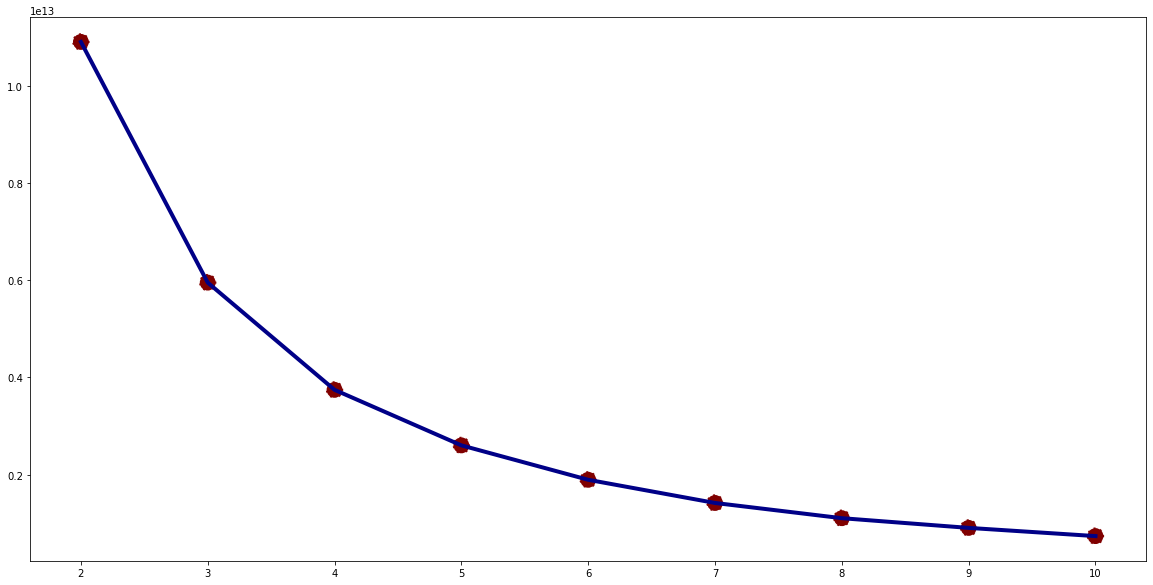

In [17]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


Observation:
1. from 4 to n, the gap between value are decline than between 1 to 5
2. after 4-5, still have notice able difference between theme
Conclussion:
* I choose 5 cluster as our total cluster

In [18]:
kmeans = KMeans(n_clusters=5, random_state=123).fit(df_std)

In [19]:
df_data_std = pd.DataFrame(data=df_std, columns=list(df))

In [20]:
df_std['clusters'] = kmeans.labels_
df['clusters'] = kmeans.labels_


In [21]:
df.head(3)

,L,R,F,M,C,clusters
0,90.200000,1,210,580717,0.961639,1
1,86.566667,7,140,293678,1.252314,1
2,87.166667,11,135,283712,1.254676,1


# Evaluasi

In [22]:
df['clusters'].value_counts().sort_index()

0    15730
1     5337
2     4255
3    12111
4    24611
Name: clusters, dtype: int64

In [23]:
kmeans_cc = kmeans.cluster_centers_  # Cluster center
print('The various clustering centers are:\n',kmeans_cc)


The various clustering centers are:
 [[ 1.16094184e+00 -3.77438378e-01 -8.66355853e-02 -9.45420456e-02
  -1.56893014e-01]
 [ 4.83551752e-01 -7.99413281e-01  2.48315495e+00  2.42425727e+00
   3.09787292e-01]
 [ 4.07521844e-02 -2.32993527e-03 -2.32407891e-01 -2.36767589e-01
   2.16900461e+00]
 [-3.13072314e-01  1.68707882e+00 -5.73910449e-01 -5.36725346e-01
  -1.75466654e-01]
 [-7.00318428e-01 -4.15128221e-01 -1.60626736e-01 -1.60330905e-01
  -2.58203510e-01]]


In [24]:
kmeans_labels = kmeans.labels_  # Sample category label
print('The category label of each sample is:\n',kmeans_labels)

The category label of each sample is:
 [1 1 1 ... 4 3 3]


In [25]:
r1 = pd.Series(kmeans.labels_).value_counts()  # Count the number of samples in different categories
print('The final number of each category is:\n',r1.sort_index())

The final number of each category is:
 0    15730
1     5337
2     4255
3    12111
4    24611
dtype: int64


In [26]:
cluster_center = pd.DataFrame(kmeans.cluster_centers_,\
                columns = ['ZL','ZR','ZF','ZM','ZC'])
cluster_center

,ZL,ZR,ZF,ZM,ZC
0,1.160942,-0.377438,-0.086636,-0.094542,-0.156893
1,0.483552,-0.799413,2.483155,2.424257,0.309787
2,0.040752,-0.002330,-0.232408,-0.236768,2.169005
3,-0.313072,1.687079,-0.573910,-0.536725,-0.175467
4,-0.700318,-0.415128,-0.160627,-0.160331,-0.258204


In [27]:
cluster_center.index = pd.DataFrame(kmeans.labels_ ).\
                     drop_duplicates().iloc[:,0]
cluster_center

,ZL,ZR,ZF,ZM,ZC
0,,,,,
1,1.160942,-0.377438,-0.086636,-0.094542,-0.156893
2,0.483552,-0.799413,2.483155,2.424257,0.309787
0,0.040752,-0.002330,-0.232408,-0.236768,2.169005
4,-0.313072,1.687079,-0.573910,-0.536725,-0.175467
3,-0.700318,-0.415128,-0.160627,-0.160331,-0.258204


In [28]:
import matplotlib.pyplot as plt 
# Customer group radar chart
labels = ['ZL','ZR','ZF','ZM','ZC']
legen = ['Customer Group' + str(i + 1) for i in df.index]  # Customer group naming as the legend of the radar chart
lstype = ['-','--',(0, (3, 5, 1, 5, 1, 5)),':','-.']
kinds = list(cluster_center.iloc[:, 0])
# Since the radar chart needs to ensure that the data is closed, add column L and convert it to np.ndarray
cluster_center = pd.concat([cluster_center, cluster_center[['ZL']]], axis=1)
centers = np.array(cluster_center.iloc[:, 0:])

# Divide the circumference and close it
n = len(labels)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
angle = np.concatenate((angle, [angle[0]]))
cluster_center

,ZL,ZR,ZF,ZM,ZC,ZL
0,,,,,,
1,1.160942,-0.377438,-0.086636,-0.094542,-0.156893,1.160942
2,0.483552,-0.799413,2.483155,2.424257,0.309787,0.483552
0,0.040752,-0.002330,-0.232408,-0.236768,2.169005,0.040752
4,-0.313072,1.687079,-0.573910,-0.536725,-0.175467,-0.313072
3,-0.700318,-0.415128,-0.160627,-0.160331,-0.258204,-0.700318


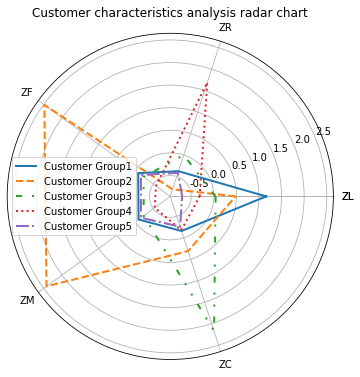

<function matplotlib.pyplot.close(fig=None)>

In [29]:
# Drawing
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, polar=True)  # Draw graphics in polar coordinates
plt.rcParams['axes.unicode_minus'] = False  # Used to display negative signs normally 

# Line drawing
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linestyle=lstype[i], linewidth=2, label=kinds[i])

ax.set_thetagrids(angle * 180 / np.pi, list(cluster_center))
plt.title('Customer characteristics analysis radar chart')
plt.legend(legen)
plt.show()
plt.close


Obseservation:
1. Customer Group 0 (15730 People), the biggest feature of this kind of people is the long time to join the membership (L),which belongs to the old customers, but their flight times (F) and total mileage (M) are not much, the average fare per kilometer and the average discount rate (C) are not high , And the average flight time interval is not long, indicating that such customers are not very active after joining the conference. They may have taken a few flights and have not taken the airline ’s plane again. They are considered lost customers. You should try to grasp the latest information of these customers, maintain interaction with customers, and adopt certain marketing methods such as preferential measures and cross-selling to restore such customers.
2. Customer Group 1 (5337 People), the biggest feature is that the average flight time interval is long, the number of flights and the total mileage are small, the average fare per kilometer and the average discount rate are not high, and the membership time is also shorter, such users It is usually an occasional consumption, which may be due to seasonal reasons or related to promotional activities. For such users, it is necessary to maintain and stimulate consumption as much as possible.

3. Customer Group 2 (4255 People), the biggest feature is that the average fare per kilometer and the average discount rate are the highest, the number of flights, total mileage and membership time are less. This type of customer is a high-value customer, generally a high-end customer Business personnel in the cabin are the key to maintaining and developing, and can adopt relevant preferential policies such as member upgrade measures to increase their number of rides.

4. Customer Group 3 (12111 People), has the largest total mileage and number of flights. The average fare per kilometer and the average discount rate are higher, the membership time is longer, and the loyalty of such customers is higher. Need to maintain well, you can also use member upgrade measures.

5. Customer Group 4 (24611 People), has low data in all aspects and belongs to low-value users. For these users, they should be maintained as much as possible, and then stimulate their consumption to stimulate their consumption vitality.

Conculssion:
with our Observation above we are going name our group into
1. Customer Group 0 = Focus on developing customers
2. Customer Group 1 = Seasonal / Promotional cutomers
3. Customer Group 2 = Important retention customers
4. Customer Group 3 = VIP Customer
5. Customer Group 4 = Generally keep customers